In [11]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import pymc as pm ## If this line gives you an error, uncomment and execute the following cell
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
path_to_data = 'https://raw.githubusercontent.com/ccontrer/MATH509-Winter2025-JupyterNotebooks/main/Data/'
data_all = pd.read_csv(path_to_data + "Howell1.csv", sep=";", header=0)
data_all

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


# Q1
Please use the code from the Week 3 notebook and modify it as necessary to answer this question.

Suppose a colleague of yours, who works on allometry, glances at the practice problems just above. Your colleague exclaims, “That’s silly. Everyone knows that it’s only the logarithm of body weight that scales with height!” Let’s take your colleague’s advice and see what happens.


# A
Model the relationship between height (cm) and the natural logarithm of weight (log-kg). Use the **entire** Howell1 data frame, all 544 rows, adults and non-adults.

\begin{align*}
    h_{i} &\sim \text{Normal}(\mu_{i}, \sigma) \\
    \mu_{i} &= \alpha + e^{\log{\beta}} \log(w_i) \\
    \alpha & \sim \\
    \log(\beta) & \sim \\
    \sigma &\sim
\end{align*}

# B
To check the prior, plot 100 sample curves from prior predictive simulations (see Week 4 notebook for examples). Is the prior reasonable? Do you think it should be changed? Why or why not?

# C
Approximate the posterior distribution using the MCMC approximation (using Pymc3).

# D
Create a plot with the following information (each is a function of weight)
  1. a scatter plot of the data (height vs weight)
  2. predicted mean height
  3. the 97% interval for the mean height (use `fillbetween`)
  4. the 97% interval for posterior predicted heights (use `fillbetween`)
  
Be sure to label the $x$ and $y$ axis. Make it look nice.

In [22]:
#Set random seed to replicate results
RANDOM_SEED = 8927
random.seed(RANDOM_SEED)

#Part A
pm.Normal
with pm.Model() as model_4_3:
  #chatGPT for best ways to estimate standard deviation/mean
    sigma = pm.Uniform("sigma", 0, data_all['height'].std()) ## uniform prior for sigma
    alpha = pm.Normal("alpha", mu = data_all['height'].mean(), sigma=data_all['height'].std()) ## normal prior for alpha
    logbeta = pm.Normal("logbeta", mu=0, sigma=1) ## normal prior for logbeta
    mu = alpha + np.exp(logbeta)*np.log(data_all['weight']) ## linear model (hidden variable)
    height = pm.Normal("height", mu=mu, sigma=sigma, observed=data_all['height']) ## likelihood
    trace_4_3 = pm.sample(1000, tune=1000) ## these are the MCMC samples!

trace_4_3_df = trace_4_3.posterior.to_dataframe()
trace_4_3_df

Output()

Output()

alpha   logbeta     sigma
chain draw                               
0     0    -25.668878  3.861028  4.930127
      1    -24.316263  3.857150  5.478510
      2    -24.214340  3.856823  5.463460
      3    -24.615911  3.856881  5.462575
      4    -24.423118  3.856662  5.456099
...               ...       ...       ...
1     995  -21.274643  3.839464  5.193269
      996  -22.338587  3.845581  5.169932
      997  -23.553170  3.848893  5.362025
      998  -23.033685  3.845867  5.015671
      999  -23.369829  3.849028  5.100398

[2000 rows x 3 columns]

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'logbeta'}>,
        <Axes: title={'center': 'logbeta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

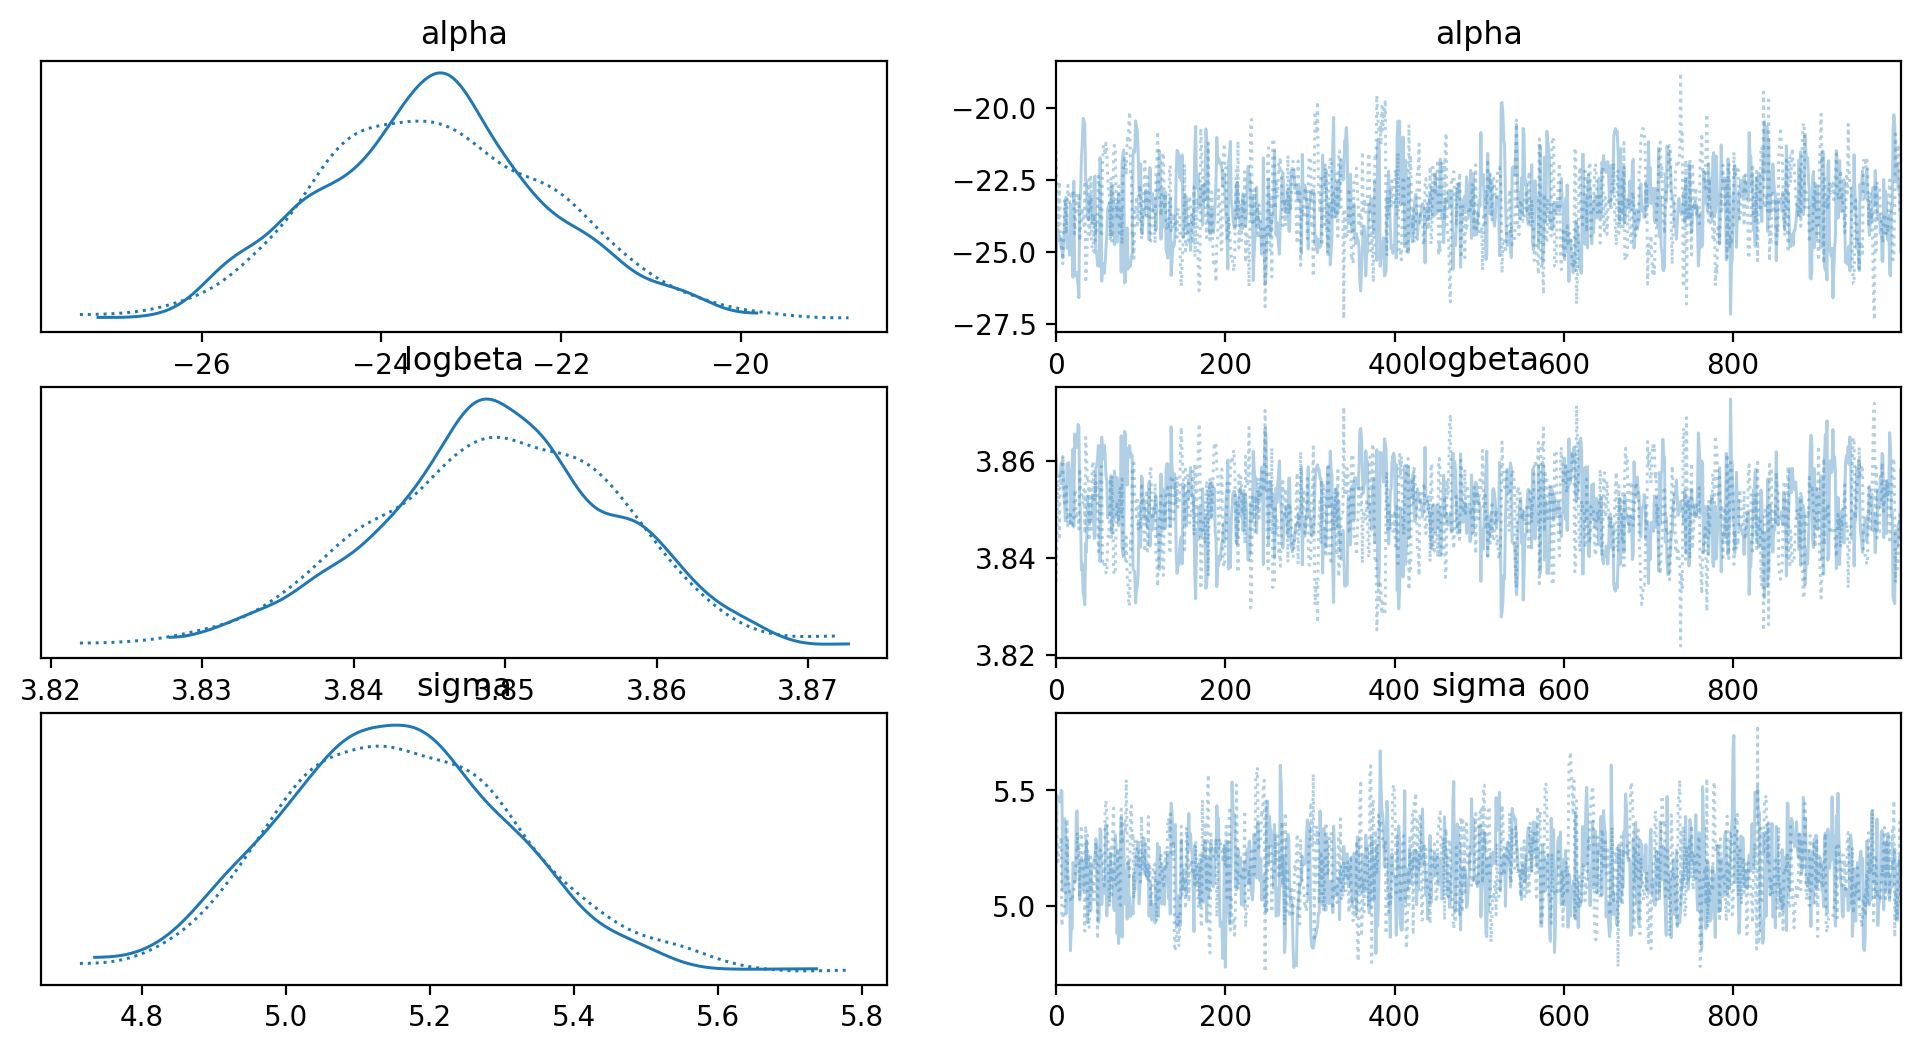

In [25]:

pm.plot_trace(trace_4_3)

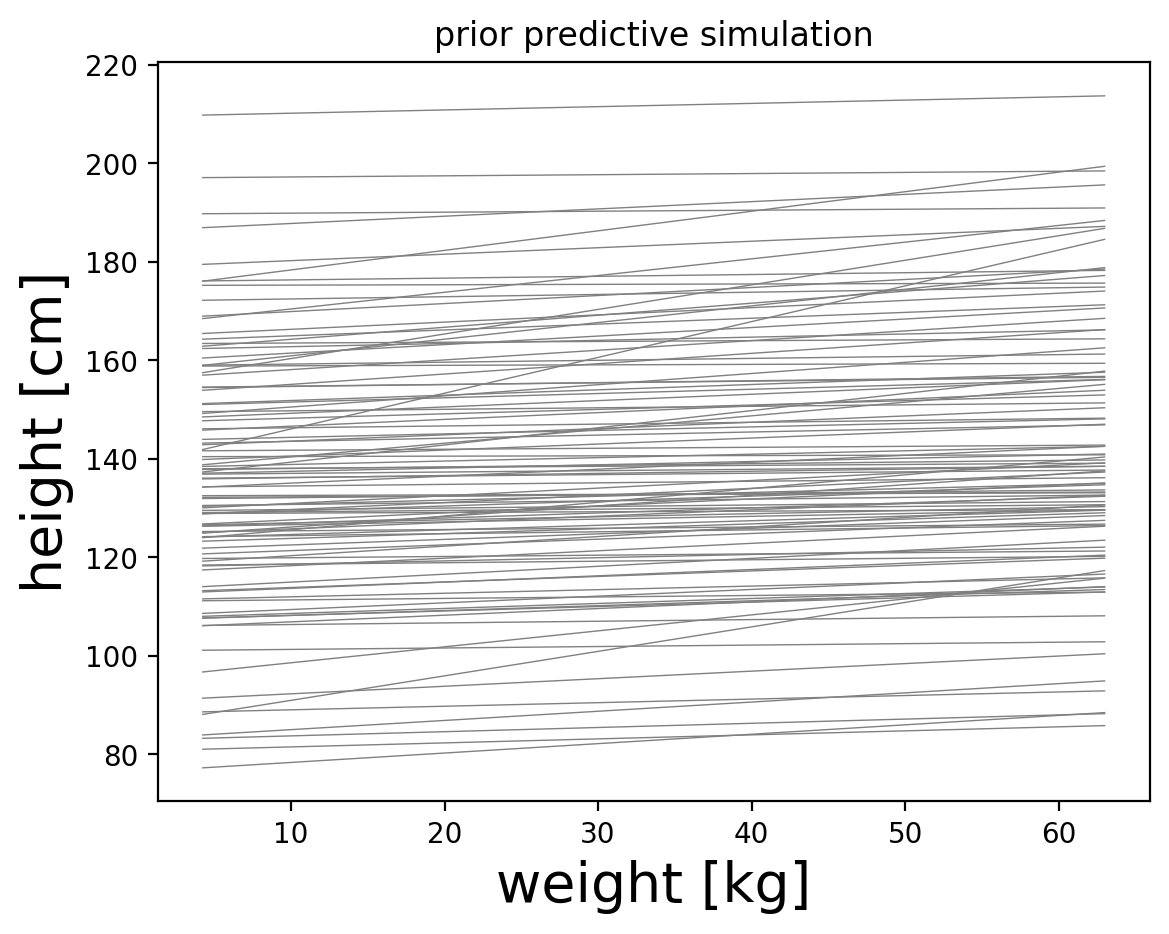

In [42]:
n_samples = 100

alpha = stats.norm.rvs(data_all['height'].mean(), data_all['height'].std(), size= n_samples)
logbeta1 = stats.norm.rvs(0, 1, n_samples)
sigma = stats.uniform.rvs(0,50, n_samples)

xmin = data_all['weight'].min()
xmax = data_all['weight'].max()
xmean = data_all['weight'].mean()
x_shifted = array(data_all['weight'] - data_all['weight'].mean())
x_standardized = x_shifted/x_shifted.std()
x = linspace(xmin, xmax, 200) ## weight range
xsmin = x_standardized.min()
xsmax = x_standardized.max()
x_s = linspace(xsmin, xsmax, 200) ## standardized weight range

mu = (alpha[None, :]
      + exp(logbeta1[None, :])*x_s[:, None])


plot(x, mu, '0.5', lw=0.5)
# ylim(-100, 400)
title('prior predictive simulation')
xlabel('weight [kg]', fontsize=20)
ylabel('height [cm]', fontsize=20);